Wall time:  26.3 seconds
Mean: 6.84957e+00
Max: 1.00000e+02
Min: -2.57588e-59


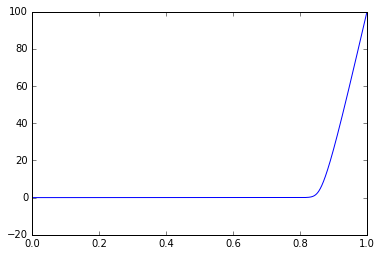

In [4]:
import time
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

def implicit_full_matrix(N, L, initial_value, left_bc, right_bc, c, rho, k_function, delta_t, t_n):
    
    """
    N : Number of nodes (including boundaries)
    L : Length of domain
    initial_values : .....
    c : specific heat of medium (scalar constant)
    rho : density of medium (scalar constant)
    K : thermal conductivity of medium (function of scalar variable, u)
    left_bc
    right_bc
    delta_t
    t_n
    """
    
    # System of equations
    A = np.ndarray( (N,N), dtype=np.float64)
    f = np.ndarray( (N), dtype=np.float64)

    # Create solution vector
    u_old = np.ndarray( (N), dtype=np.float64 )
    u_new = np.ndarray( (N), dtype=np.float64 )
    
    # Distance between nodes
    h = L/(N-1)
    
    # Set initial values
    u_new.fill(initial_value)
    
    clock_start = time.time()
    t = 0.0
    while t < t_n:
        
        # Copy new solution to old
        u_old = u_new
        
        # Reset system Au = f
        A.fill(0.0); f.fill(0.0)
        
        # Coefficients for equations of interior nodes
        # (all but boundary nodes)
        for i in np.arange(1,N-1):
            
            # Compute the nonlinear r(u) for the node
            r = ( k(u_old[i])*delta_t ) / ( c*rho*h*h )
            
            # Insert the coefficients for equation i
            A[i, i-1] = r
            A[i, i] = -(2.0*r + 1)
            A[i, i+1] = r
            f[i] = -u_old[i]
            
        # Modify for boundary conditions
        A[0,0] = 1.0;       f[0] = left_bc
        A[N-1, N-1] = 1.0;  f[N-1] = right_bc
        
#         u_new = scipy.linalg.solve(A, f)
        Ainv = np.linalg.inv(A)
        u_new = np.dot(Ainv, f)
        
        if N < 10:
            print(''.join('{:6.2f} -- '.format(t)) +
                    ''.join('{:6.2f} '.format(x) for x in u_new))
        t = t + delta_t
    clock_stop = time.time()
    
    print(''.join('Wall time: {:5.1f} seconds'.format(clock_stop - clock_start)))
    print(''.join('Mean: {:10.5e}'.format(u_new.mean())))
    print(''.join('Max: {:10.5e}'.format(u_new.max())))
    print(''.join('Min: {:10.5e}'.format(u_new.min())))
    
    # Plot final solution
    x = np.linspace(0,L,N)
    plt.plot(x, u_new)
    plt.show()

def k(u):
    """
    Thermal conductivity. Nonlinear function of u
    """
    return 0.01*u + 0.01

def main():
    L = 1.0        # Length of problem domain
    N = 3000       # Number of nodes (including boundary conditions)
    C = 2.0
    RHO = 5.0
    
    TN = 0.5       # End time
    DELTA_T = 0.05 # Timestep size
    
    LEFT_BC = 0.0
    RIGHT_BC = 100.00
    INITIAL_VALUE = 0.0
    
    implicit_full_matrix(N=N, L=L,
                        initial_value=INITIAL_VALUE,
                        left_bc=LEFT_BC, right_bc=RIGHT_BC,
                        c=C, rho=RHO, k_function=k,
                        delta_t=DELTA_T, t_n=TN)

main()